<a href="https://colab.research.google.com/github/abdelghafourbk/MIV_Projects/blob/main/LegumesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building

In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# first dataset
# dataset link: 
!unzip gdrive/MyDrive/LegumesDataset/LegumesDataset.zip

Archive:  gdrive/MyDrive/LegumesDataset/LegumesDataset.zip
   creating: LegumesDataset/
   creating: LegumesDataset/Potato/
  inflating: LegumesDataset/Potato/IMG_20230515_095741.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095736.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095732.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095727.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095659.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095654.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095646.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095637.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095613.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095604.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095559.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095553.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095545.jpg  
  inflating: LegumesDataset/Potato/IMG_20230515_095533.jpg  
  inflating: LegumesDa

In [ ]:
# added dataset
#dataset link: https://drive.google.com/drive/folders/17W4jsC1SXehyFaoRV19Q3qjQMmFOR9ia?usp=sharing
!unzip gdrive/MyDrive/UpdatedLegumesDataset/AddedDataset.zip

Archive:  gdrive/MyDrive/UpdatedLegumesDataset/AddedDataset.zip
   creating: AddedDataset/
   creating: AddedDataset/HotPeeper/
  inflating: AddedDataset/HotPeeper/8507417d-ec1c-4168-a85b-85b4fade5983.jpg  
  inflating: AddedDataset/HotPeeper/IMG_9462.heic  
  inflating: AddedDataset/HotPeeper/IMG_9463.heic  
  inflating: AddedDataset/HotPeeper/IMG_9464.heic  
  inflating: AddedDataset/HotPeeper/IMG_9465.heic  
  inflating: AddedDataset/HotPeeper/IMG_9466.heic  
  inflating: AddedDataset/HotPeeper/IMG_9467.heic  
  inflating: AddedDataset/HotPeeper/IMG_9468.heic  
  inflating: AddedDataset/HotPeeper/IMG_9469.heic  
  inflating: AddedDataset/HotPeeper/IMG_9470.heic  
  inflating: AddedDataset/HotPeeper/IMG_9471.heic  
  inflating: AddedDataset/HotPeeper/IMG_9472.heic  
  inflating: AddedDataset/HotPeeper/IMG_9473.heic  
  inflating: AddedDataset/HotPeeper/IMG_9474.heic  
  inflating: AddedDataset/HotPeeper/IMG_9475.heic  
  inflating: AddedDataset/HotPeeper/IMG_9476.heic  
  inflating: 

In [ ]:
data_dir = "/content/LegumesDataset"
data_dir_added = "/content/AddedDataset"

# labels = name of classes
# firstClasses = os.listdir(data_dir)
# secondClasses = os.listdir(data_dir_added)

In [ ]:
import shutil

# Define the destination folder
destination_folder = '/content/MainData'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Merge subfolders from main folder 1
for subfolder in os.listdir(data_dir):
    source_subfolder = os.path.join(data_dir, subfolder)
    destination_subfolder = os.path.join(destination_folder, subfolder)
    shutil.copytree(source_subfolder, destination_subfolder)

# Merge subfolders from main folder 2
for subfolder in os.listdir(data_dir_added):
    source_subfolder = os.path.join(data_dir_added, subfolder)
    destination_subfolder = os.path.join(destination_folder, subfolder)
    shutil.copytree(source_subfolder, destination_subfolder)

In [ ]:
classes = os.listdir(destination_folder)

In [ ]:
# classes = firstClasses + secondClasses
print(classes)

['Onion', 'HotPeeper', 'Tomato', 'Potato', 'Beet', 'Cucumber', 'Pepper', 'Garlic', 'Carrot', 'Turnip', 'Squach']


In [ ]:
nb_classes = len(classes)

batch_size = 4

datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
    	subset='training',
		classes=classes)

val_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical',
    	subset='validation',
		classes=classes)


Found 256 images belonging to 11 classes.
Found 57 images belonging to 11 classes.


In [ ]:
# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(nb_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_generator,
      epochs=15,
      batch_size = 5,
      validation_data=val_generator)

Epoch 1/15
64/64 [==============================] - 82s 1s/step - loss: 3.1882 - accuracy: 0.1211 - val_loss: 2.2461 - val_accuracy: 0.1579
Epoch 2/15
64/64 [==============================] - 80s 1s/step - loss: 2.0126 - accuracy: 0.2344 - val_loss: 1.7399 - val_accuracy: 0.3158
Epoch 3/15
64/64 [==============================] - 87s 1s/step - loss: 1.6355 - accuracy: 0.3672 - val_loss: 1.4099 - val_accuracy: 0.4737
Epoch 4/15
64/64 [==============================] - 84s 1s/step - loss: 1.4662 - accuracy: 0.4570 - val_loss: 1.5159 - val_accuracy: 0.4561
Epoch 5/15
64/64 [==============================] - 81s 1s/step - loss: 1.3560 - accuracy: 0.5195 - val_loss: 1.2234 - val_accuracy: 0.5789
Epoch 6/15
64/64 [==============================] - 80s 1s/step - loss: 1.1656 - accuracy: 0.5547 - val_loss: 1.1813 - val_accuracy: 0.5263
Epoch 7/15
64/64 [==============================] - 82s 1s/step - loss: 0.9940 - accuracy: 0.6523 - val_loss: 0.9658 - val_accuracy: 0.6491
Epoch 8/15
64/64 [==

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(val_generator)

15/15 [==============================] - 20s 1s/step - loss: 0.5538 - accuracy: 0.8421


In [ ]:
import matplotlib.pyplot as plt

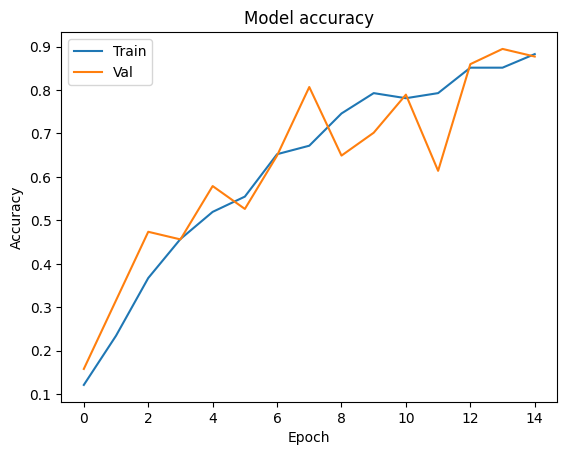

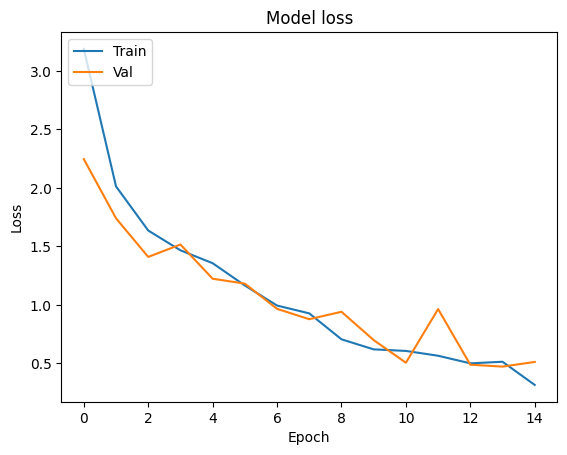

In [ ]:
# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Utilisation

In [ ]:
import numpy as np
from PIL import Image

In [ ]:
image = Image.open("/content/images.jpeg")
original_image = image  # save the original image to display it later
# lreprocess the user's image
image = image.resize((150, 150))
image_array = np.array(image) / 255.0  # normalization
image_array = np.expand_dims(image_array, axis=0) # add batch dimension

In [ ]:
# make a prediction
prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)
print(predicted_class)
print(classes)
print(classes[predicted_class])

1/1 [==============================] - 0s 126ms/step
9
['Onion', 'HotPeeper', 'Tomato', 'Potato', 'Beet', 'Cucumber', 'Pepper', 'Garlic', 'Carrot', 'Turnip', 'Squach']
Turnip


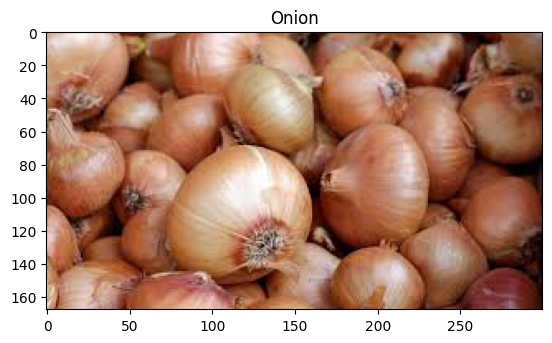

In [ ]:
plt.title(classes[predicted_class])
plt.imshow(original_image)